# Image Processing Assignment 1: Histogram Equalization

Before we start, please put your names and IDs in following format

: Firstname LASTNAME, #00000000   //   (e.g.) Dana LEVI, #12345678

**Your Answer:**   
Sagiv ANTEBI, #318159282

# Histogram Equalization

In this exercise you will implement the **Histogram Equalization** algorithm.

**Pay Attention!** Do not use image processing functions such (ex. `numpy.histogram()`). You have to implement it by yourself.

Method: as explained in class.

Notes:
*   Write your code in the dedicated areas (TODO blocks). You can add helper functions.
*   Submission email should include a link to Colab submission notebook located on your Google Drive with Commenter access right to nevo.doron@live.biu.ac.il
*   The solution notebook should be able to be run (‘Run all’) with no errors.
In case of errors, the submission will be disqualified.
*   Grade will depend on correct performance on several grayscale images and on clean programming and documentation.
*   Do not forget to add the Names and Student I.D. at the top of the notebook.




# Getting Started

## Setup Code
Before getting started, we need to run some boilerplate code to set up our environment. You will need to rerun this setup code each time you start the notebook.

In [1]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
GITHUB_PATH = 'https://raw.githubusercontent.com/dnevo/ImageProcessing/main/images/'

In [3]:
def read_file(file_name:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image 
    in a numpy array.

    Args:
        file_name: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, file_name)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [4]:
img = read_file(file_name='house.tiff')

In [5]:
def plot_img(img: np.array, figsize:(int,int)=None):
    if figsize:
        plt.figure(figsize = figsize)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

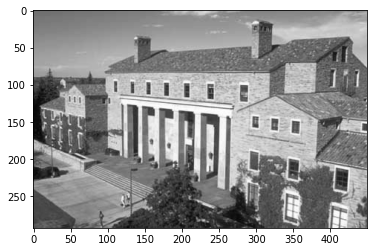

In [6]:
plot_img(img)

In [7]:
def create_histogram(img: np.array)-> np.array:
  # Getting the size of the img: n - rows | m - cols
  n,m = img.shape
  
  # Making a new histogram containing only zeros
  img_hist = np.zeros(256)
  
  # Counting the occurrences of each gray value in our img
  for i in range(n):
    for j in range(m):
      index = img[i,j]
      img_hist[index] += 1

  # Create the accum histogram
  accum_hist = img_hist
  for i in range(1,256):
    accum_hist[i] = img_hist[i] + accum_hist[i-1]

  # Normalize the accum hist and return it
  return accum_hist / (n * m)



def hist_shape(img_src: np.array, img_dest: np.array) -> np.array:
    '''
    This function perform an grayscale image enhancement using Histogram 
    Equalization.
    Args:
        img_src: image in int16 format - the image to enhance
        img_dest: image in int16 format - the histogram will be based on it.

    Returns:
        img_new: Returned image, in int16 format - the enhanced image
    '''
    ######################################################################
    # TODO: Implement image enhancement using histogram Equalization.
    ######################################################################

    # By calling the function we made - we are creating the normalize accumulated histograms
    hist_acc_src_img = create_histogram(img_src)
    hist_acc_dest_img = create_histogram(img_dest)

    index_src = 0
    index_dest = 0

    b_min = 0
    b_max = 256

    # Maintain the new grayscale after the Histogram Equalization.
    conversion_vector = np.zeros(b_max, dtype = np.int16)

    while index_src < b_max:
      # Chekcs if the aacum hist of the dest is lower than the src - then continue
      if hist_acc_dest_img[index_dest] < hist_acc_src_img[index_src]:
        index_dest += 1
      # else we need to update our conversion vector accordingly to this position
      else:
        conversion_vector[index_src] = index_dest
        index_src += 1
    
    # The new Image sizes
    r, c = img_src.shape
    # The new image to return
    img_new = np.zeros((r,c), dtype = np.int16)

    # setting the new img with our conversion vector that contains the result
    for i in range(r):
      for j in range(c):
        img_new[i,j] = conversion_vector[img_src[i,j]]

    ######################################################################
    #                            END OF YOUR CODE                        #
    ######################################################################
    return img_new

In [8]:
def create_tiled_image(img_big: np.array, img_small: np.array) -> np.array:
    '''
    This function receives 2 grayscale image (matrix of int16, values:0..255) and 
    creates a new image. The new image consists of tiles of the small image 
    which forms the big image. Each of the small image tiles is processed using 
    the histShape function to match the histogram of the big image in the same 
    location.
    Args:
        img_big: image in int16 format - the image to enhance
        img_small: image in int16 format - the histogram will be based on it.

    Returns:
        img_new: returned image, in int16 format - the tiled image
    '''

    ######################################################################
    # TODO: Implement tiles image using histogram Equalization.
    ######################################################################
    
    # The sizes of img_big
    r_big,c_big = img_big.shape

    # The sizes of img_small
    r_small,c_small = img_small.shape

    # The new Image to return - The big size one
    img_new = np.zeros((r_big,c_big), dtype=np.int16)
    
    # From python documentation of range: range(start, stop, step)
    # Which means we iterate and making steps as the img_small size
    for i in range(0, r_big,r_small):
      for j in range(0, c_big, c_small):
        # We create and put the new small image in his place according to the hist_shape function
        img_new[i:i + r_small,j: j + c_small] = hist_shape(img_small,img_big[i:i + r_small,j: j + c_small])

    ######################################################################
    #                            END OF YOUR CODE                        #
    ######################################################################

    return img_new

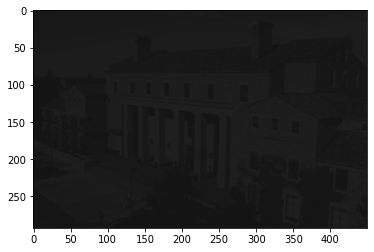

In [9]:
img_src = read_file(file_name='darkimage.tiff')
plot_img(img_src)

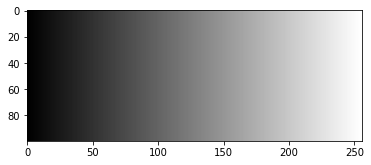

In [10]:
img_dest = read_file(file_name='flatHistShape.tiff')
plot_img(img_dest)

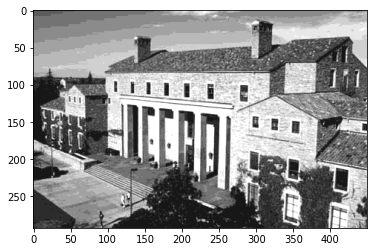

In [11]:
img_new = hist_shape(img_src, img_dest)
plot_img(img_new)

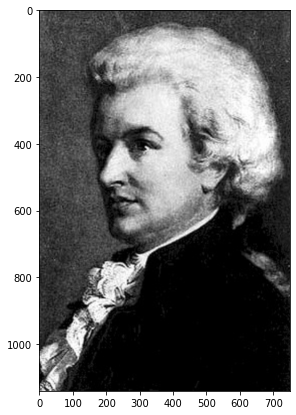

In [12]:
img_big = read_file(file_name='bigMozart.tiff')
plot_img(img_big, figsize=(7,7))

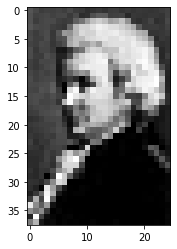

In [13]:
img_small = read_file(file_name='smallMozart.tiff')
plot_img(img_small)

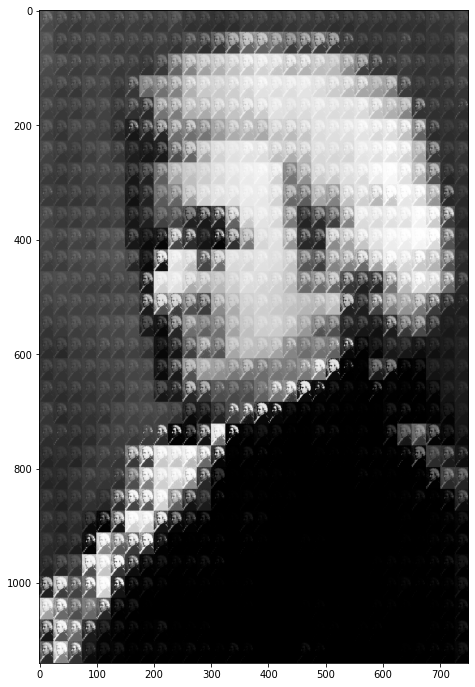

In [14]:
img_new = create_tiled_image(img_big, img_small)
plot_img(img_new, figsize=(12,12))